In [33]:
#Imports do Projeto
import pandas as pd
import re
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import chardet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
#Bases do Projeto

# Caminho do arquivo
filedir = "E:/desmoid/dataframe_limpo.csv"

# Detectar o encoding do arquivo
with open(filedir, 'rb') as file:
    result = chardet.detect(file.read())

# Carregando os dados do arquivo CSV com o encoding detectado
df = pd.read_csv(filedir, encoding=result['encoding'])


In [6]:
# 5 primeiras linhas e 30 primeiras colunas (as demais colunas são todas no mesmo padrão)
df.iloc[:5, :30]

,TítuloAmostra,TipoAmostra,Samplechannelcount,NomeFonteAmostraCh1,OrganismoAmostraCh1,CaracterísticasAmostraCh1,CaracterísticasAmostraCh1.1,CaracterísticasAmostraCh1.2,CaracterísticasAmostraCh1.3,CaracterísticasAmostraCh1.4,...,ProcessamentoDadosAmostra,IDPlataformaAmostra,Sampledatarowcount,IDREF,1007sat,1053at,117at,121at,1255gat,1294at
0,JMC_001,RNA,1,desmoid tumor,Homo sapiens,tissue: desmoid tumor,Sex: M,tumor location: extra abdominal,tumor size (mm): 55,age at diagnosis: 39,...,"Bioconductor package, GCRMA algorithm",GPL570,54613,GSM1416998,273.34,126.21,66.25,121.27,16.45,227.92
1,JMC_002,RNA,1,desmoid tumor,Homo sapiens,tissue: desmoid tumor,Sex: F,tumor location: abdominal wall,tumor size (mm): 40,age at diagnosis: 23,...,"Bioconductor package, GCRMA algorithm",GPL570,54613,GSM1416999,337.05,109.38,36.88,131.25,15.79,216.28
2,JMC_003,RNA,1,desmoid tumor,Homo sapiens,tissue: desmoid tumor,Sex: F,tumor location: extra abdominal,tumor size (mm): 50,age at diagnosis: 42,...,"Bioconductor package, GCRMA algorithm",GPL570,54613,GSM1417000,273.14,107.36,72.45,166.12,8.90,178.10
3,JMC_004,RNA,1,desmoid tumor,Homo sapiens,tissue: desmoid tumor,Sex: F,tumor location: extra abdominal,tumor size (mm): 25,age at diagnosis: 54,...,"Bioconductor package, GCRMA algorithm",GPL570,54613,GSM1417001,277.00,106.30,41.65,146.82,11.69,205.22
4,JMC_005,RNA,1,desmoid tumor,Homo sapiens,tissue: desmoid tumor,Sex: F,tumor location: extra abdominal,tumor size (mm): 120,age at diagnosis: 62,...,"Bioconductor package, GCRMA algorithm",GPL570,54613,GSM1417002,398.81,122.50,56.35,178.77,63.40,279.60


In [8]:
#Dados Gerais sobre a base
lines, columns = df.shape
print("Número de linhas:", lines)
print("Número de colunas:", columns)

numeric_vars = df.select_dtypes(include=['number']).shape[1]
non_numeric_vars = df.select_dtypes(exclude=['number']).shape[1]

print("Número de variáveis numéricas:", numeric_vars)
print("Número de variáveis não numéricas:", non_numeric_vars)

Número de linhas: 128
Número de colunas: 54637
Número de variáveis numéricas: 54616
Número de variáveis não numéricas: 21


In [9]:
#Dados úteis sobre a base
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Columns: 54637 entries, TítuloAmostra to 91952at
dtypes: float64(54607), int64(9), object(21)
memory usage: 53.4+ MB
None


In [10]:
#Dados estatísticos Gerais das colunas numéricas:
print(df.describe())

       Samplechannelcount  Sampletaxidch1  Sampledatarowcount     1007sat  \
count               128.0           128.0               128.0  128.000000   
mean                  1.0          9606.0             54613.0  355.383750   
std                   0.0             0.0                 0.0  136.334298   
min                   1.0          9606.0             54613.0   97.180000   
25%                   1.0          9606.0             54613.0  260.767500   
50%                   1.0          9606.0             54613.0  346.600000   
75%                   1.0          9606.0             54613.0  435.202500   
max                   1.0          9606.0             54613.0  783.040000   

           1053at       117at       121at    1255gat      1294at      1316at  \
count  128.000000  128.000000  128.000000  128.00000  128.000000  128.000000   
mean   111.927578   53.208125  185.738516   22.26375  252.218125   28.146563   
std     16.250342   21.677339   42.979267   18.62121   58.123504  

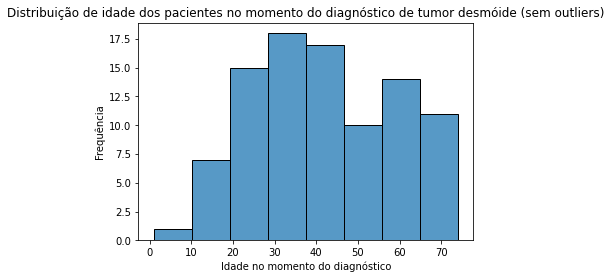

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Seleciona a coluna "age at diagnosis" e extrai os números inteiros das strings
def extract_age(age_string):
    if isinstance(age_string, str):
        age = re.search(r'\d+', age_string)
        return int(age.group()) if age else None
    return None

ages = df['CaracterísticasAmostraCh1.4'].apply(extract_age).dropna()

# Remove outliers (idades acima de 74) - Na base aparecem 4 valores acima de 100 que parecem erros 
ages = ages[ages <= 100]

# Plota um histograma das idades ajustadas usando Seaborn
sns.histplot(ages, kde=False, bins='auto', edgecolor='black')
plt.xlabel('Idade no momento do diagnóstico')
plt.ylabel('Frequência')
plt.title('Distribuição de idade dos pacientes no momento do diagnóstico de tumor desmóide (sem outliers)')
plt.show()

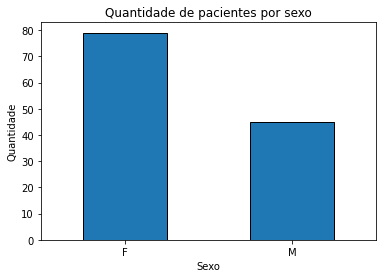

In [24]:
#Qual é a proporção de gênero (masculino e feminino) entre os pacientes com tumor desmóide?
# Conta a frequência de cada sexo
def extract_sex(feature_string):
    if isinstance(feature_string, str):
        if "Sex: M" in feature_string:
            return "M"
        elif "Sex: F" in feature_string:
            return "F"
    return None

sex_counts = df['CaracterísticasAmostraCh1.1'].apply(extract_sex).value_counts()
sex_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Quantidade de pacientes por sexo')
plt.xticks(rotation=0)
plt.show()

In [26]:
#Existe alguma diferença na expressão gênica entre pacientes com tumor desmóide localizado na parede abdominal e aqueles com tumor extra-abdominal?

# Separe os pacientes em dois grupos: parede abdominal e extra-abdominal
abdominal_wall_patients = df[df['CaracterísticasAmostraCh1.2'] == 'tumor location: abdominal wall']
extra_abdominal_patients = df[df['CaracterísticasAmostraCh1.2'] == 'tumor location: extra abdominal']

# Selecione apenas colunas numéricas e calcule a média da expressão gênica para cada grupo
abdominal_wall_mean = abdominal_wall_patients.select_dtypes(include='number').mean(axis=0)
extra_abdominal_mean = extra_abdominal_patients.select_dtypes(include='number').mean(axis=0)

# Calcule a diferença entre as médias dos dois grupos
difference = abdominal_wall_mean - extra_abdominal_mean

# Mostre os genes com as maiores diferenças na expressão gênica
print(difference.nlargest(10))

225016at     1121.997701
224588at     1033.005343
203878sat     935.495461
226814at      643.787191
205381at      617.576382
200795at      604.370637
204712at      564.338824
222484sat     560.384892
204620sat     533.185407
201667at      519.080088
dtype: float64


In [29]:
#Há alguma correlação entre o tamanho do tumor e a expressão gênica em pacientes com tumor desmóide?
# Extraia o tamanho do tumor de cada paciente e converta-o em uma série numérica
tumor_sizes = df['CaracterísticasAmostraCh1.3'].str.extract('(\d+)').astype(float)

# Selecione apenas as colunas numéricas relacionadas à expressão gênica
gene_expression = df.select_dtypes(include='number')

# Adicione a série de tamanho do tumor ao DataFrame de expressão gênica
gene_expression['tumor_size'] = tumor_sizes

# Calcule o coeficiente de correlação de Pearson entre o tamanho do tumor e a expressão gênica
correlations = gene_expression.corrwith(gene_expression['tumor_size'], method='pearson')

# Remova a correlação do tamanho do tumor com ele mesmo
correlations.drop('tumor_size', inplace=True)

# Mostre as correlações mais altas e mais baixas
print("Top 10 correlações positivas:\n", correlations.nlargest(10))
print("\nTop 10 correlações negativas:\n", correlations.nsmallest(10))

Top 10 correlações positivas:
 211655at      0.574641
226902at      0.484138
215498sat     0.422798
229770at      0.422001
1555492aat    0.420740
229876at      0.417557
244311at      0.410606
229529at      0.409081
201199sat     0.405153
230367at      0.404640
dtype: float64

Top 10 correlações negativas:
 222566at     -0.388186
205140at     -0.367296
1557227sat   -0.357350
1563259at    -0.356207
215583at     -0.353575
232489at     -0.350443
211675sat    -0.347008
235366at     -0.334654
203491sat    -0.333843
238902at     -0.331940
dtype: float64


In [31]:
#Utilizando aprendizado de máquina ou deep learning, é possível prever a localização do tumor desmóide (extra-abdominal ou parede abdominal) com base na expressão gênica?

# Crie um novo DataFrame contendo apenas os dados de expressão gênica
X = df.select_dtypes(include='number')

# Crie uma nova coluna binária para a localização do tumor: 1 para extra-abdominal e 0 para parede abdominal
y = df['CaracterísticasAmostraCh1.2'].apply(lambda x: 1 if x == 'tumor location: extra abdominal' else 0)

# Divida os dados em conjuntos de treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine um modelo de classificação de Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

# Exiba a acurácia, o relatório de classificação e a matriz de confusão
print("Acurácia: {:.2f}%".format(accuracy * 100))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia: 80.77%

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.83      0.95      0.88        20

    accuracy                           0.81        26
   macro avg       0.75      0.64      0.66        26
weighted avg       0.79      0.81      0.78        26


Matriz de Confusão:
 [[ 2  4]
 [ 1 19]]


In [ ]:
#Utilizando aprendizado de máquina ou deep learning, é possível prever o tamanho do tumor com base na expressão gênica e nas características clínicas dos pacientes?

# Crie um novo DataFrame contendo apenas os dados de expressão gênica
X = df_filled.select_dtypes(include='number')
# Preencha valores ausentes com a média dos valores não ausentes
df_filled = df.fillna(df.mean())
# Extraia a coluna de tamanho do tumor
tumor_size_str = df_filled['CaracterísticasAmostraCh1.3'].str.extract('tumor size \(mm\): (\d+)', expand=False)
df_filled['tumor_size'] = pd.to_numeric(tumor_size_str)

# Crie a variável target (tamanho do tumor)
y = df_filled['tumor_size']

# Divida os dados em conjuntos de treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine um modelo de regressão Random Forest
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = regr.predict(X_test)

# Calcule a métrica de erro quadrático médio (MSE) e o coeficiente de determinação (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exiba o MSE e o R^2
print("Erro Quadrático Médio (MSE): {:.2f}".format(mse))
print("Coeficiente de Determinação (R^2): {:.2f}".format(r2))

In [20]:
#PCA - Encontra o número de componentes ideais
pca = PCA()
pca.fit(df_numeric)

# Calcule a porcentagem cumulativa da variância explicada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Encontre o número de componentes que explicam pelo menos 95% da variância
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f'Número de colunas originais: {df_numeric.shape[1]}')
print(f'Número de componentes para 95% da variância: {n_components_95}')

Número de colunas originais: 54616
Número de componentes para 95% da variância: 67


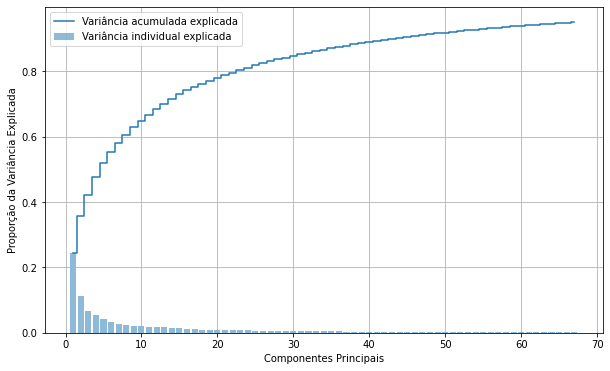

  TítuloAmostra TipoAmostra NomeFonteAmostraCh1 OrganismoAmostraCh1  \
0       JMC_001         RNA       desmoid tumor        Homo sapiens   
1       JMC_002         RNA       desmoid tumor        Homo sapiens   
2       JMC_003         RNA       desmoid tumor        Homo sapiens   
3       JMC_004         RNA       desmoid tumor        Homo sapiens   
4       JMC_005         RNA       desmoid tumor        Homo sapiens   

  CaracterísticasAmostraCh1 CaracterísticasAmostraCh1.1  \
0     tissue: desmoid tumor                      Sex: M   
1     tissue: desmoid tumor                      Sex: F   
2     tissue: desmoid tumor                      Sex: F   
3     tissue: desmoid tumor                      Sex: F   
4     tissue: desmoid tumor                      Sex: F   

       CaracterísticasAmostraCh1.2 CaracterísticasAmostraCh1.3  \
0  tumor location: extra abdominal         tumor size (mm): 55   
1   tumor location: abdominal wall         tumor size (mm): 40   
2  tumor location: e

In [21]:
# Colunas para excluir (não numéricas)
columns_to_exclude = ['TítuloAmostra', 'TipoAmostra', 'NomeFonteAmostraCh1', 
                      'OrganismoAmostraCh1', 'CaracterísticasAmostraCh1', 
                      'CaracterísticasAmostraCh1.1', 'CaracterísticasAmostraCh1.2', 
                      'CaracterísticasAmostraCh1.3', 'CaracterísticasAmostraCh1.4', 
                      'CaracterísticasAmostraCh1.5', 'CaracterísticasAmostraCh1.6', 
                      'ProtocoloTratamentoAmostraCh1', 'MoléculaAmostraCh1', 'ProtocoloExtraçãoAmostraCh1', 
                      'EtiquetaAmostraCh1', 'ProtocoloEtiquetaAmostraCh1', 'ProtocoloHibridaçãoAmostra', 
                      'ProtocoloVarreduraAmostra', 'ProcessamentoDadosAmostra', 'IDPlataformaAmostra', 'IDREF']

# Separe as colunas de metadados
metadata = df[columns_to_exclude]

# Exclua as colunas listadas e preencha os valores NaN com 0
df_numeric = df.drop(columns=columns_to_exclude).fillna(0)

# Verifique e substitua valores infinitos por valores numéricos muito grandes
df_numeric = df_numeric.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Aplique PCA
# Instanciar PCA com 67 componentes
pca = PCA(n_components=67)

# Ajustar e transformar os dados numéricos
principal_components = pca.fit_transform(df_numeric)

# Criar um novo DataFrame com os componentes principais
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(67)])

# Mesclar o dataframe de componentes principais com o dataframe de metadados
final_df = pd.concat([metadata, principal_df], axis=1)

# Variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Plotar a variância explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 68), explained_variance, alpha=0.5, align='center', label='Variância individual explicada')
plt.step(range(1, 68), np.cumsum(explained_variance), where='mid', label='Variância acumulada explicada')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.legend(loc='best')
plt.grid()
plt.show()

# Visualizar o DataFrame com os componentes principais e as colunas de metadados
print(final_df.head())